### Import dependencies

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Chess Board class

In [2]:
class Board:
    """
    Chess board class
    """
    size = 8
    white = (1, 1, 1)
    blue = (0, 0, 1)
    red = (1, 0, 0)
    
    def __init__(self):
        """
        Constructor for chess board
        """
        self.red = {}
        self.blue = {}
        self.reset_board()

    def reset_board(self):
        """
        Gennerates an 8x8 chessboard
        """
        self.grid = np.zeros((Board.size, Board.size, 3))
        for i in range(Board.size):
            for j in range(Board.size):
                if (i+j) % 2:
                    self.grid[i][j] = Board.white

    def add_red(self, row:int, col:int):
        """
        Add or move red queen on the board at row, col
        """
        if self.red:
            self.reset_board()
            if self.blue:
                self.grid[self.blue['row'], self.blue['col']] = Board.blue
        self.red = {'row': row, 'col': col} 
        self.grid[row][col] = Board.red
    
    def add_blue(self, row:int, col:int):
        """
        Add or move a blue queen on the board at row, col
        """
        if self.blue:
            self.reset_board()
            if self.red:
                self.grid[self.red['row'], self.red['col']] = Board.red
        self.blue = {'row': row, 'col': col} 
        self.grid[row, col] = Board.blue
    
    def render(self):
        """
        Display the chess board
        """
        plt.imshow(self.grid)

    def is_under_attack(self) -> bool:
        """
        Returns true if either queen is under attack
        """
        if not self.red or not self.blue:
            return False
        else:
            same_row = self.red['row'] == self.blue['row']
            same_col = self.red['col'] == self.blue['col']
            row_diff = self.red['row'] - self.blue['row']
            col_diff = self.red['col'] - self.blue['col']
            diag = abs(row_diff) - abs(col_diff) == 0
        return same_row or same_col or diag

### Tests

#### queens on same row should be “under attack”

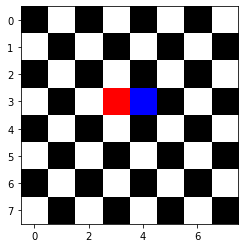

In [3]:
board = Board()
board.add_red(3,3)
board.add_blue(3,4)
board.render()
assert board.is_under_attack() == True


#### queens on same column should be “under attack”

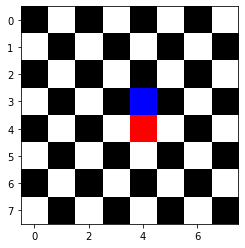

In [4]:
board = Board()
board.add_red(4,4)
board.add_blue(3,4)
board.render()
assert board.is_under_attack() == True


#### queens on same diagonal should be “under attack”

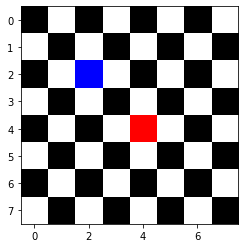

In [5]:
board = Board()
board.add_red(4,4)
board.add_blue(2,2)
board.render()
assert board.is_under_attack() == True

#### queens with any other coordinates should NOT be “under attack”

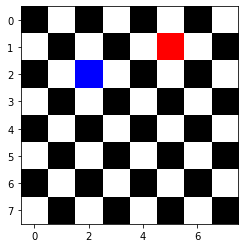

In [6]:
board = Board()
board.add_red(1,5)
board.add_blue(2,2)
board.render()
assert board.is_under_attack() == False